In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [101]:
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import *

import matplotlib.pyplot as plt
import numpy as np

In [66]:
backend = Aer.get_backend("qasm_simulator")

In [127]:
def run_for_result(qc):
    """
    Run on simulator and plot. 
    :var qc: Quantum Circuit. 
    """
    qobj = assemble(qc, shots=1000)
    results = backend.run(qobj).result()
    answer = results.get_counts()
    
    return answer

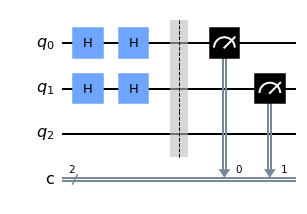

In [68]:
qc = QuantumCircuit(3, 2)

qc.h(range(2))

qc.h(range(2))

qc.barrier()
qc.measure(range(2), range(2))

qc.draw("mpl")

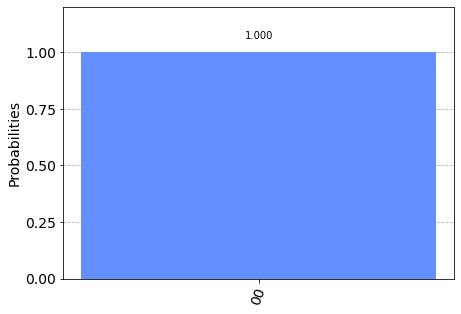

In [82]:
answer = run_for_result(qc)
plot_histogram(answer)

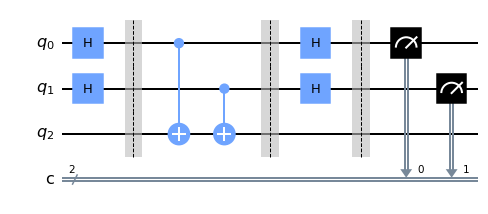

In [84]:
qc = QuantumCircuit(3, 2)

qc.h(range(2))
qc.barrier()

qc.cnot(0, 2)
qc.cnot(1, 2)

qc.barrier()
qc.h(range(2))


qc.barrier()
qc.measure(range(2), range(2))

qc.draw("mpl")

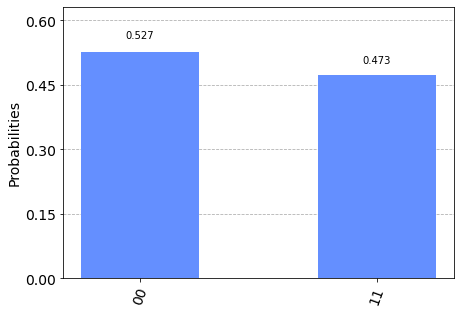

In [85]:
answer = run_for_result(qc)
plot_histogram(answer)

**Let's try to generate gates randomly**

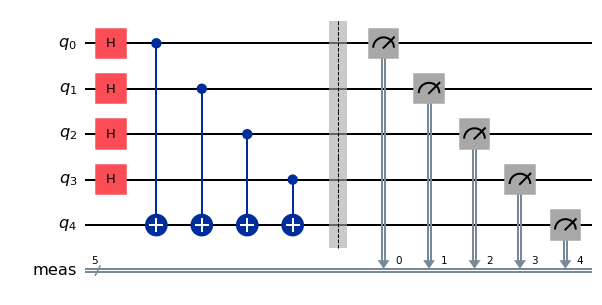

In [130]:
# Random number generator

n = 5

rnd_gen = QuantumCircuit(n)

rnd_gen.h(range(n - 1))

for i in range(n - 1):
    rnd_gen.cnot(i, n - 1)  # Because qubit starts from 0 and ends at 19. 
    
rnd_gen.measure_all()

rnd_gen.draw("mpl", style="iqx")

In [137]:
answer = run_for_result(rnd_gen)

In [138]:
random_numbers = [key for key in answer.keys()]
random_numbers

['11000',
 '10001',
 '10100',
 '11110',
 '10111',
 '10010',
 '11011',
 '00110',
 '01100',
 '00101',
 '11101',
 '01001',
 '01010',
 '01111',
 '00011',
 '00000']

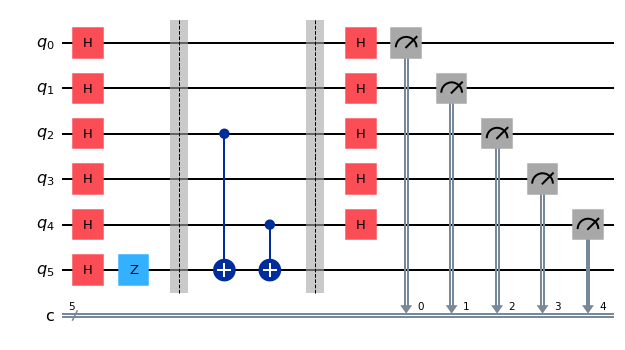

In [141]:
qc = QuantumCircuit(n + 1, n)

choice = np.random.randint(0, len(random_numbers) + 1)  # Choose a random number
choice = random_numbers[choice]  # Use the random number above to pick the location of str in our list of random numbers. 

# Put auxillary in state |->
qc.h(n)
qc.z(n)

# Main circuit (non auxillary)

qc.h(range(n))
qc.barrier()

for q in range(n):
    if choice[q] == "1":
        qc.cnot(q, n)

qc.barrier()
qc.h(range(n))

qc.measure(range(n), range(n))

qc.draw("mpl", style="iqx")

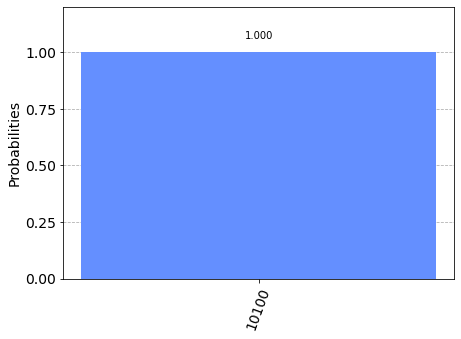

In [142]:
answer = run_for_result(qc)
plot_histogram(answer)